In [1]:
import sys
from pathlib import Path
PROJECT_ROOT = Path.cwd().parent
SRC_DIR = PROJECT_ROOT / 'src'
DATA_RAW_DIR = PROJECT_ROOT / 'data' / 'raw' / 'psychiatric-motor-activity-dataset'
sys.path.append(str(SRC_DIR))
from core.pma_base import PMActivity
#from core.pma_base import PMAPerson
from core.pma_base import PMADataADHDKaggle
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\Trainee\Documents\Hallo_DPP\data


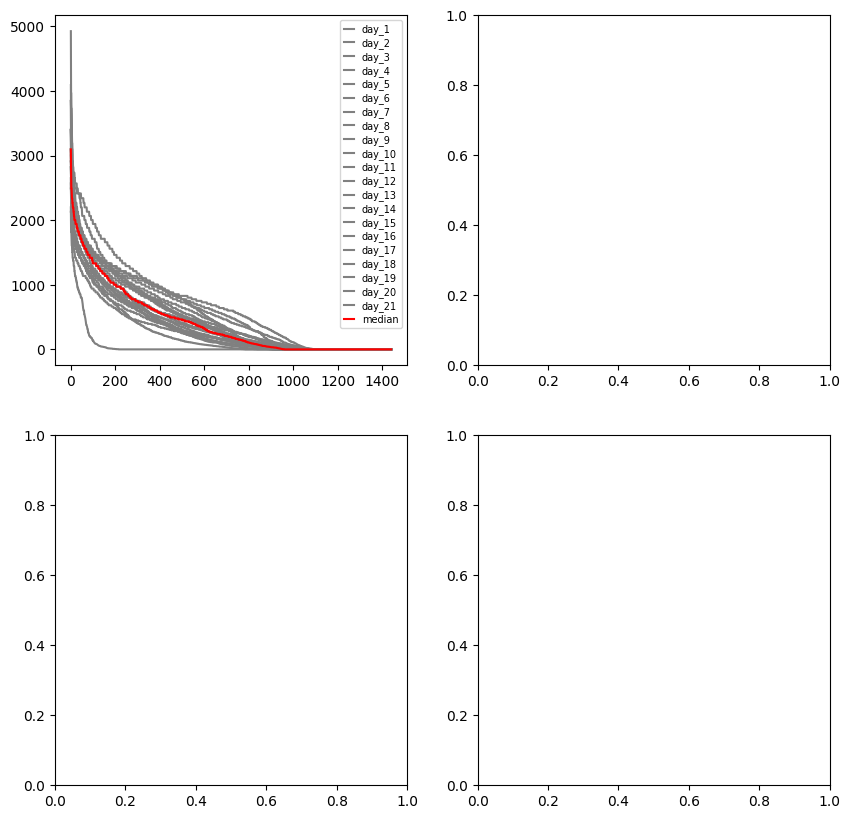

In [4]:
from cProfile import label
import statistics as stat
from turtle import color
p = PMADataADHDKaggle('control_2')
day=-1; start_hour=12; end_hour=15
#p.activity.activity_day_from_to_hour(day, start_hour, end_hour)
L = p.activity.ordered_activities(0,24)

median_values = []
for m in range(1440):
    values = []
    for key in L.keys():
        ord_act = L[key]
        if not (ord_act is None):
            values.append(ord_act[m])
    median_values.append( stat.median(values) )

L['median'] = median_values
L.keys()

fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10,10))

for key in L.keys():
    ord_act = L[key]
    if not (ord_act is None):
        if key == 'median':
            color = 'red'
        else:
            color = 'grey'
        ax[0,0].plot(ord_act, label=key, color=color)
ax[0,0].legend(fontsize=7, handlelength=1, labelspacing=0.3)

            

In [ ]:
import sys
from pathlib import Path
PROJECT_ROOT = Path.cwd().parent
SRC_DIR = PROJECT_ROOT / 'src'
DATA_RAW_DIR = PROJECT_ROOT / 'data' / 'raw' / 'psychiatric-motor-activity-dataset'
sys.path.append(str(SRC_DIR))
from core.pma_base import PMActivity
#from core.pma_base import PMAPerson
from core.pma_base import PMADataADHDKaggle
import matplotlib.pyplot as plt
import pandas as pd

diags  = ['adhd', 'clinical', 'control', 'depression', 'schizophrenia']
pat_lists = {}
max_npat = 0
for diag in diags:
    df = pd.read_csv(DATA_RAW_DIR / f"{diag}-info.csv")
    pat_lists[diag] = list(df.loc[:,'number'])
    print(pat_lists[diag])
    npat = len(pat_lists[diag])
    max_npat = max(max_npat, npat)

fig, ax = plt.subplots(ncols=len(diags),nrows=max_npat,figsize=(10,2*max_npat), sharex=True, sharey=True)
ax[0,0].set_ylim(0, 1000)

#def plot_all(plot_function,)

for idiag in range(len(diags)):
    diag = diags[idiag]
    pat_list = pat_lists[diag]
    print(pat_list)
    pat_id = pat_list[0]
    for ipat_id in range(len(pat_list)):
        pat_id = pat_list[ipat_id]
        p = PMADataADHDKaggle(pat_id)
        p.activity.plot_ordered_activity_8am10pm(ax[ipat_id,idiag], p.id)

plt.show()
fig.savefig('all_ordered_activity_8am10pm', dpi=300, bbox_inches='tight')



In [ ]:
import sys
from pathlib import Path
PROJECT_ROOT = Path.cwd().parent
SRC_DIR = PROJECT_ROOT / 'src'
DATA_RAW_DIR = PROJECT_ROOT / 'data' / 'raw' / 'psychiatric-motor-activity-dataset'
sys.path.append(str(SRC_DIR))
from core.pma_base import PMActivity
#from core.pma_base import PMAPerson
from core.pma_base import PMADataADHDKaggle
import matplotlib.pyplot as plt
import pandas as pd
p = PMADataADHDKaggle('control_20')
p.activity.ordered_activity_8am10pm_debug(5)

In [ ]:
# old stuff
dir_data_raw='../data/raw/psychiatric-motor-activity-dataset/'
dis = 'adhd'
print(dis)
#dis = 'depression'
#dis = 'schizophrenia'
#dis = 'clinic'
#dis = 'control'
pat = '1'
#import os
#os.listdir(dir_data_raw + dis + '/')
#filename=#
import pandas as pd
acty_rawfile = dir_data_raw + dis + '/' + dis + '_' + pat + '.csv'
df = pd.read_csv(acty_rawfile,parse_dates=["timestamp"])
print(df.head())

bla=PMActivity(df)
print(type(bla.meas_begin_time.minute))
print(bla.meas_end_datetime)
print(bla.meas_duration.days)
print(bla.meas_duration)
print(bla.meas_days)
print(bla.meas_minutes)
print(bla.meas_minutes_to_12pm)


import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,2,figsize=(5,5), sharex=True, sharey=True)
bla.plot_ordered_activity_24h(ax[1,0])

dis = 'schizophrenia'
acty_rawfile = dir_data_raw + dis + '/' + dis + '_' + pat + '.csv'
df = pd.read_csv(acty_rawfile,parse_dates=["timestamp"])
bla=PMActivity(df)
bla.plot_ordered_activity_24h(ax[0,1])

In [12]:
import statistics as stat
stat.median([1,2,3,4,4,6,8,9])

4.0